<a href="https://colab.research.google.com/github/SantiData87/CoderHouse_DataScience_Biblioteca/blob/main/2_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Completar



*   Visualizacion; orden diapositiva y agregar  Funnel

*   AnoS "NUMERICO"

*   NULOS tratamiento: Diapositiva Importantes 124
*   OUTLIERS tratamiento

*   PCA: Reduccion de la dimensionalidad. C15


# LINKS

DATASET  | LINK
-------------------|------------------
MERCADO PAGO - FUNNEL| S
IBM - RRHH	| https://colab.research.google.com/drive/1jySHGHHvDelAegqUNwg4_lLdCJcUuLmW
TITANIC	| https://colab.research.google.com/drive/1nKmiQL1-pG1iaeFIWSoEaaCis-QqOfhm


# Feature Engineering

**Ingenieria de Atributos**

## 1)Feature Creation

Es el proceso de crear nuevas variables con el fin de desarrollar modelos más eficientes.
Es recomendable no añadir muchas más variables de las que se tienen en cualquier dataset.



## 2) Normalizacion

Data Transformation

Previo a aplicar PCA:
Importante: Los datos no tienen que tener nulos y deben ser todos numericos
*   Analizo Outliers en X_num
*   NORMALIZO



### **MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Defino/Instancio mi escalador
scaler = MinMaxScaler()

#Escalo/Normalizo mi df
X_num = scaler.fit_transform(X_num)

#Convierto en df
X_num = pd.DataFrame(X_num)

### **StandardScaler**

In [ ]:
#Normalizamos los datos para que PCA funcione mejor una vez ya definidos X_train y X_test
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## 2)Feature Extraction: **PCA**

Data Reduction:
**PCA** - Reduccion de la dimensionalidad

C44: PCA 1: https://colab.research.google.com/drive/1vlj-OqDDcJbnOLjXcSamheF4gZb11-O4

C44: PCA 2: https://colab.research.google.com/drive/1v3AblttJSIUP-dBgnfT1ut55LMCAqJZP

C44: PCA 3: https://colab.research.google.com/drive/1ZuMmv1io-kAQTwu7PJAZLPPAy161StoW

Opcion 1

In [ ]:
#Separamos en train y test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Normalizamos los datos para que PCA funcione mejor!
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#Aplicacion de PCA
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
#Análisis de la varianza explicada para cada componente
explained_variance = pca.explained_variance_ratio_
explained_variance

**1 Componente + Random Forest**

In [ ]:
from sklearn.decomposition import PCA

#Elijo un solo 1 componete
pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creación del modelo
model_rf = RandomForestClassifier(max_depth=2, random_state=0)
model_rf.fit(X_train, y_train)

# Predicción
y_pred = model_rf.predict(X_test)

In [ ]:
#Evaluación básica del modelo
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('El accuracy del modelo es:', accuracy)

## 2) Feature Selection: **SFS**

C19: FEATURE ENGINEERING https://colab.research.google.com/drive/1clIn5C0r5L9V8y1Jb1q9sEEjZYSsTGfL#scrollTo=yZzLOBUf3XUx


### I **Foward, Backward y Stepw**

**Foward** (definiendo funcion)

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

**Backward** (definiendo funcion)

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
backward_elimination(X,y)

**Stepwise** (definiendo funcion)

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

### II **Profesor (Manual)**

Filtro y Selecciono:

*   **y**: Variable **OBJETIVO**
*   **X_cat**: df con las cariables **CATEGORICAS utiles** sujetas a encoding (excluida la variable objetivo y)
*   **X_num**: df con las cariables **NUMERICAS utiles** sujetas a normalizacion (excluida la variable objetivo y). Previo a la normalizacion analizo Outliers

In [ ]:
y= df['COL_VARIABLE_OBJETIVO']

In [ ]:
#Defino Columnas con las variables Categoricas
X_cat = df[[ 'COL_CAT_1', 'COL_CAT_2', 'COL_CAT_3']]

In [ ]:
#Defino Columnas con las variables Numericas: Seleccionando todas menos las CATEGORICAS
X_num= df.drop([ 'COL_VARIABLE_OBJETIVO','COL_CAT_1', 'COL_CAT_2', 'COL_CAT_3'], axis=1)

### III **SFS**


La función SequentialFeatureSelector() acepta los siguientes argumentos principales:

* LinearRegression() es un estimador de todo el proceso. Del mismo modo, puede ser cualquier algoritmo basado en clasificación.

* k_features indica el número de características que se seleccionarán. Puede ser cualquier valor aleatorio, pero el valor óptimo se puede encontrar analizando y visualizando las puntuaciones para diferentes números de características.

* argumentos hacia adelante y flotantes forward = Verdadero y floating = Falso son para la técnica de selección hacia adelante.

* El argumento de puntuación especifica el criterio de evaluación que se utilizará. Para problemas de regresión, solo hay una puntuación $r^2$ en la implementación predeterminada. De manera similar, para la clasificación, puede ser exactitud, precisión, recuperación, puntaje f1, etc.

* El argumento cv es para la validación cruzada usando k-fold.

In [ ]:
#Descarga de sklearn
!pip install mlxtend

#Obtengo Liberias
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Obtengo Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

#Aplico metodo Sequential Forward Selection(sfs)
#Seleccione una cantidad de 8 variables y el metodo de r2
sfs = SFS(LinearRegression(),
          k_features=8,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
#Opcion1: Simple
sfs.fit(X, y)
sfs.k_feature_names_     #Lista final de features

In [ ]:
#Opcion2: Muestra en lista numerada
sfs.fit(X, y)
columnas_elegidas= list(sfs.k_feature_names_)     #Lista final de features
columnas_elegidas_numeradas = [[i + 1, item] for i, item in enumerate(columnas_elegidas)]
for item in columnas_elegidas_numeradas:
    print(item)

## 3)Encoding

Data Discretizacion: Es el proceso de convertir variables por medio de algún proceso de **escalamiento** o encoding

### I **Nominales**

Recomendable cuando las variables de la columna **son <=4** y no tienen un orden de prelacion


a) **One hot Encoder**

In [ ]:
#Aplico One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder() #Instancio el modelo
X_cat = ohe.fit_transform(X_cat).toarray() #Entreno el modelo
X_cat = pd.DataFrame(X_cat) #Lo transformo en df

b) **Getdummies**

Mas sencillo y No requiere que las categorías sean mayores o iguales a cero como One Hot Encoding

In [ ]:
#Encoding
from sklearn.preprocessing import OneHotEncoder

#Siendo "X_cat" el df de todas las variables categoricas menos la variable objetivo "y"
X_cat = pd.get_dummies(X_cat)

### II **Ordinales**



a) **Label Encoder**

### III **Numericas**



# Modelacion


**Pasos a seguir**

1    Definir las variables X e y ( y=variable objetivo / X=resto del df)

2    Dividir las Variables: train_test_split

3    Instanciar/Definir el Modelo elegido (Algoritmo)

4    Ajustar/Entrenar el Modelo

5    Predicciones: Comparo con lo predicho (y_pred) con lo real (y_tes)

6    Metricas

7    Graficar

Librerias

In [ ]:
#Librerias
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

**Pasos**

In [ ]:
#1    Definir las variables X e y ( y=variable objetivo / X=resto del df)
#2    Dividir las Variables: train_test_split

#3    Instanciar/Definir el Modelo elegido (Algoritmo)
#4    Ajustar/Entrenar el Modelo
#5    Predicciones: Comparo con lo predicho (y_pred) con lo real (y_tes)

#6    Metricas
#7    Graficar

In [ ]:
#1    Definir las variables X e y ( y=variable objetivo / X=resto del df)
X = data.data
y = data.target

#2    Dividir las Variables: train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3    Instanciar/Definir el Modelo elegido (Algoritmo)
model = LogisticRegression()

#4    Ajustar/Entrenar el Modelo
model.fit(X_train, y_train)

#5    Predicciones: Comparo con lo real (y_tes)
y_pred = model.predict(X_test)


## 1) Defino Variable Objetivo

In [ ]:
y= df['COL_VARIABLE_OBJETIVO']

In [ ]:
#Reseteo Index
X_cat.reset_index(drop=True, inplace=True)
X_num.reset_index(drop=True, inplace=True)

#Concateno para definir X
X = pd.concat([X_cat, X_num], axis = 1)

In [ ]:
# Transformamos los nombres de todas las columnas a "string"
columnas_actuales = X.columns.tolist() # Obtener los nombres de las columnas actuales
nuevos_nombres = {col: str(col) for col in columnas_actuales} # Crear un diccionario con los nuevos nombres de columnas como 'string'
X = X.rename(columns=nuevos_nombres) # Cambiar los nombres de las columnas

In [ ]:
# Otra opcion si no dividi en X_num y X_cat
X = df_normal.drop(['COL_OBJETIVO'], axis=1)
y = df_normal['COL_OBJETIVO']

## 2) Split Test/Train

In [ ]:
#2    Dividir las Variables: train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

## 3) Modelos: Algoritmos

*   Aprendisaje Supervisado: Clasificacion
*   Aprendisaje Supervisado: Regresion
*   Aprendisaje NO Supervisado: Cluster
*   Aprendisaje NO Supervisado: Numerico



### I **AS de Clasificacion**


C40: **ARBOL de decision** https://colab.research.google.com/drive/1d_KjFHsYxWMgy8EFgThfyxZaRFWjDCrM

C41: Algoritmos de Clasificacion: https://colab.research.google.com/drive/1tjLIcDbwelikuEimXsYPt1-XVjem0Uzp#scrollTo=1IRSxU_xF-zI



In [ ]:
#Arbol de Desicion
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model = DecisionTreeClassifier(random_state=1234)

In [ ]:
#KNN
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

k=1
model = neighbors.KNeighborsClassifier(n_neighbors=k)

In [ ]:
#Regresion Logistica
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000, n_jobs=-1)

### II **AS de Regresion**


C40 PROFESOR: Caso numerico **KERAS de tensorflow**  https://colab.research.google.com/drive/13hlXM4eT8_VQC6Rm5xFuj4o3MSqafUDw

C43: REGRESION LINEAL Y MULTIPLE https://colab.research.google.com/drive/1zydSyviT0URo-2DA6WMTB6ph1ft0U6Um#scrollTo=mtIo08po0MNX

C43: RANDOM FOREST con hiperparametros: https://colab.research.google.com/drive/1UVFAsDT4WAsabBwYSI6t4PD5qpRjBJIL#scrollTo=BHkfvFQM1KAc

In [ ]:
#Regresion lineal
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn import ensemble
model = ensemble.RandomForestRegressor()

#Random Forest (opcion 2)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [ ]:
#XGBOOST
import xgboost as XGB
model  = XGB.XGBRegressor()

In [ ]:
#KERAS de tensorflow
import tensorflow as tf
from tensorflow import keras

model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])]) #Instancio el modelo
model.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['mae']) #Defino alguno Hyperparametros

### III **AnoS Cluster**

C15. (Video inicio C16)
https://colab.research.google.com/drive/1-l2LFqFriEA3Kb5RpDQQ96yXIdjx_cYb

C43: SMV: https://colab.research.google.com/drive/1zl9c8XN0W5anhL9URwpiz1yq6KaH89sy#scrollTo=gnMyH6yyznyh

C43 Kmeans: https://colab.research.google.com/drive/1N7rTIR9V1vHnSu8PebEXkVrA7cewS2Vy

C43 HDBSCAN: https://colab.research.google.com/drive/1OLF7drNN2rSFW42Jhmvj4HOxcyylvmWI



**Genero un Dataset Artifical**

In [ ]:
#Descargo librerias
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
#Genero 3 Datasets sinteticos: 1, 2 y 3
from sklearn.datasets import make_blobs, make_moons
X1, y1 = make_blobs(n_samples=1000, centers=4, cluster_std=0.5, n_features=2, random_state=0)
X2, y2 = make_blobs(n_samples=1000, centers=4, cluster_std=1, n_features=2, random_state=0)
X3, y3 = make_moons(n_samples=1000, noise=.05, random_state=0)

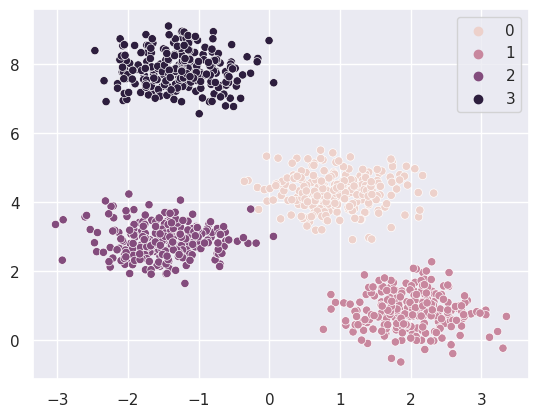

In [ ]:
#Grafico grupo de datos 1
sns.scatterplot(x= X1[:,0], y=X1[:,1], hue=y1)
plt.show()

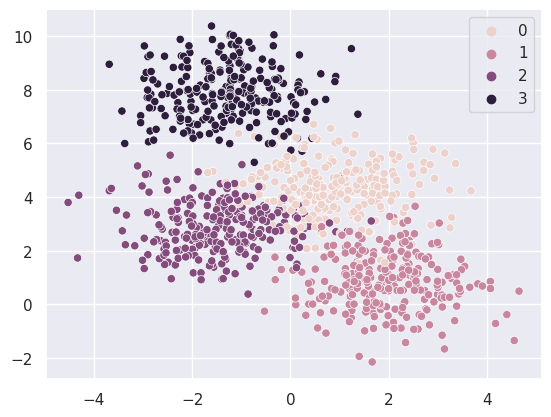

In [ ]:
#Grafico grupo de datos 2
sns.scatterplot(x= X2[:,0], y=X2[:,1], hue=y2)
plt.show()

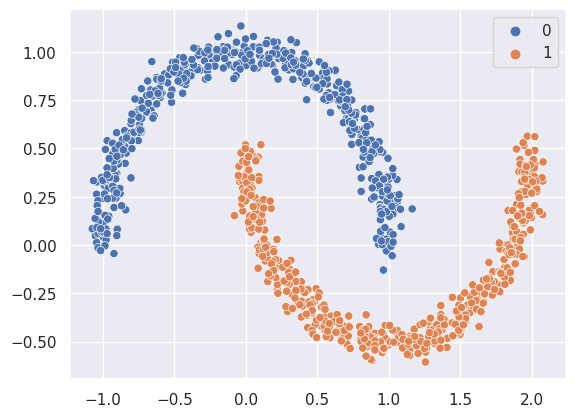

In [ ]:
#Grafico grupo de datos 3
sns.scatterplot(x= X3[:,0], y=X3[:,1], hue=y3)
plt.show()

**K-means**

In [ ]:
#Instancio el algoritmo y elijo el numero de Clusters
from sklearn.cluster import KMeans
kmeans_1 = KMeans(n_clusters=4,random_state=0)
kmeans_2 = KMeans(n_clusters=4,random_state=0)
kmeans_3 = KMeans(n_clusters=2,random_state=0)

In [ ]:
#Entreno/Ajusto el modelo
kmeans_1.fit(X1)
kmeans_2.fit(X2)
kmeans_3.fit(X3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [ ]:
# Etiqueto los datos
etiquetas_1 = kmeans_1.labels_
etiquetas_2 = kmeans_2.labels_
etiquetas_3 = kmeans_3.labels_
print(etiquetas_1.shape)
print(etiquetas_2.shape)
print(etiquetas_3.shape)

(1000,)
(1000,)
(1000,)


In [ ]:
#Obtengo los 4 centroides de cada uno de los 4 cluster (x,y)
centros_1 = kmeans_1.cluster_centers_
centros_2 = kmeans_2.cluster_centers_
centros_3 = kmeans_3.cluster_centers_
print(centros_1)
print(centros_2)
print(centros_3)

[[-1.27283855  7.84651464]
 [ 2.01942692  0.87474842]
 [-1.49807428  2.90164881]
 [ 0.92917513  4.29023124]]
[[ 0.98303401  4.28004652]
 [-1.30968364  7.85802949]
 [ 1.98933279  0.79090691]
 [-1.51959595  2.88341615]]
[[ 1.20182828 -0.07742956]
 [-0.20060669  0.57617118]]


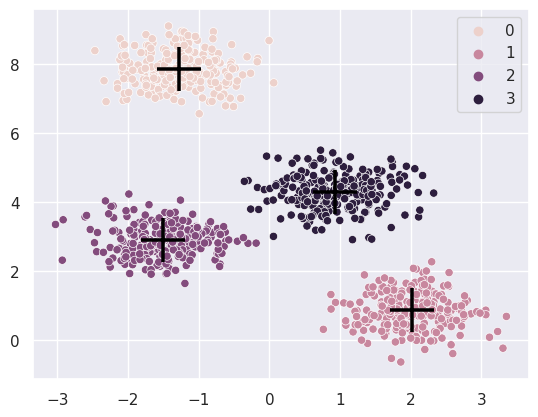

In [ ]:
#Grafico grupo de datos 1
sns.scatterplot(x= X1[:, 0], y= X1[:, -1], hue=etiquetas_1) #Dibuja la distribucion de los puntos
sns.scatterplot(x=centros_1[:,0], y=centros_1[:,1], color='black', marker="+", s=1000) #Dibuja una cruz en el centroide
plt.show()

In [ ]:
centros_1 = kmeans_1.cluster_centers_
centros_1

array([[-1.27283855,  7.84651464],
       [ 2.01942692,  0.87474842],
       [-1.49807428,  2.90164881],
       [ 0.92917513,  4.29023124]])

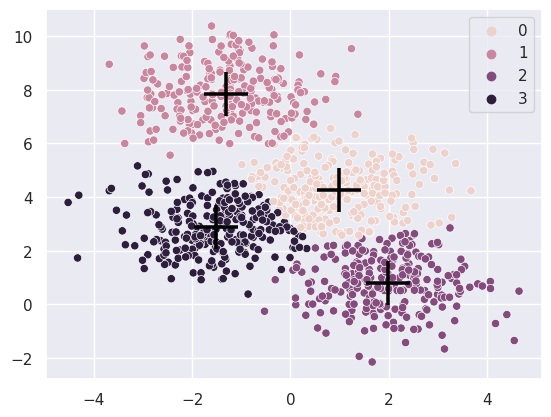

In [ ]:
#Grafico grupo de datos 2
sns.scatterplot(x= X2[:, 0], y= X2[:, -1], hue=etiquetas_2) #Dibuja la distribucion de los puntos
sns.scatterplot(x=centros_2[:,0], y=centros_2[:,1], color='black', marker="+", s=1000) #Dibuja una cruz en el centroide
plt.show()

In [ ]:
centros_2 = kmeans_2.cluster_centers_
centros_2

array([[ 0.98303401,  4.28004652],
       [-1.30968364,  7.85802949],
       [ 1.98933279,  0.79090691],
       [-1.51959595,  2.88341615]])

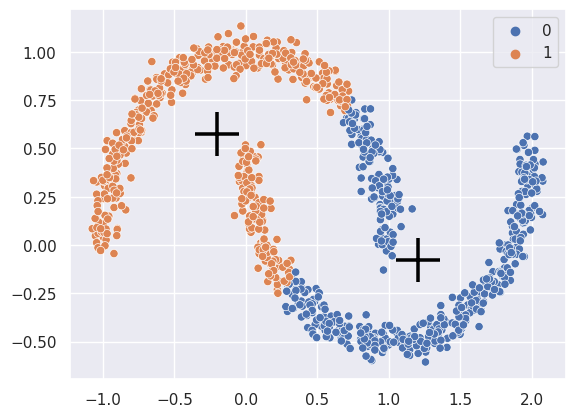

In [ ]:
#Grafico grupo de datos 3
sns.scatterplot(x= X3[:, 0], y= X3[:, -1], hue=etiquetas_3) #Dibuja la distribucion de los puntos
sns.scatterplot(x=centros_3[:,0], y=centros_3[:,1], color='black', marker="+", s=1000) #Dibuja una cruz en el centroide
plt.show()

In [ ]:
centros_3 = kmeans_3.cluster_centers_
centros_3

array([[ 1.20182828, -0.07742956],
       [-0.20060669,  0.57617118]])

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN
#Instancio el algoritmo y defino epsilon (el radio) y el minimo de muestra para decidir si es un punto fuerte
db_1 =DBSCAN(eps=0.3, min_samples=10)
db_2 =DBSCAN(eps=0.4, min_samples=12)
db_3 =DBSCAN(eps=0.2, min_samples=10)

In [ ]:
#Entreno
db_1.fit(X1)
db_2.fit(X2)
db_3.fit(X3)

DBSCAN(eps=0.2, min_samples=10)

#. clusters estimado: 5
# puntos ruidosos: 64


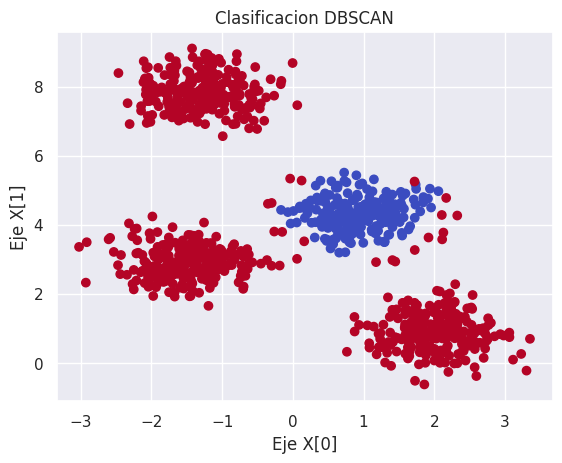

In [ ]:
# Grafico grupo 1


labels = db_1.labels_ #Etiqueto
no_clusters = len(np.unique(labels) ) #Defino Numero de Clusters
no_noise = np.sum(np.array(labels) == -1, axis=0) # Defino Ruido (Outliers)

#Imprimo Numero de Cluster y Ruido
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)

# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X1[:,0], X1[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
plt.show()

#. clusters estimado: 5
# puntos ruidosos: 300


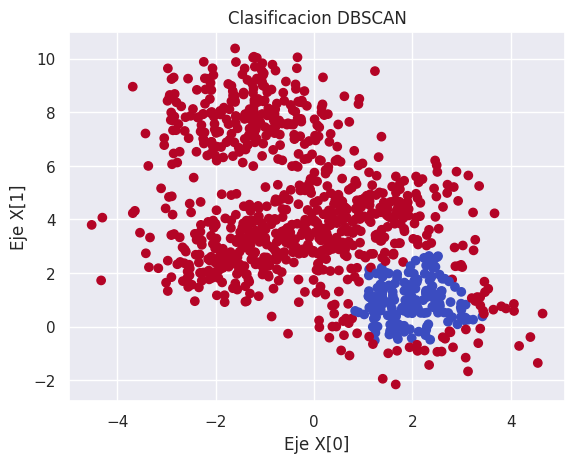

In [ ]:
# Grafico grupo 2


labels = db_2.labels_ #Etiqueto
no_clusters = len(np.unique(labels) ) #Defino Numero de Clusters
no_noise = np.sum(np.array(labels) == -1, axis=0) # Defino Ruido (Outliers)

#Imprimo Numero de Cluster y Ruido
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)

# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X2[:,0], X2[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
plt.show()

#. clusters estimado: 2
# puntos ruidosos: 0


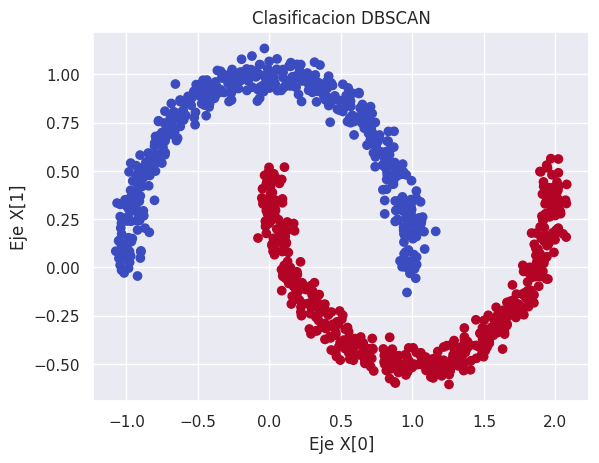

In [ ]:
# Grafico grupo 3


labels = db_3.labels_ #Etiqueto
no_clusters = len(np.unique(labels) ) #Defino Numero de Clusters
no_noise = np.sum(np.array(labels) == -1, axis=0) # Defino Ruido (Outliers)

#Imprimo Numero de Cluster y Ruido
print('#. clusters estimado: %d' % no_clusters)
print('# puntos ruidosos: %d' % no_noise)

# Generar figura de datos
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X3[:,0], X3[:,1], c=colors, marker="o", picker=True)
plt.title('Clasificacion DBSCAN')
plt.xlabel('Eje X[0]');plt.ylabel('Eje X[1]')
plt.show()

### **IV AnoS**

*   PCA
*   SFS
*   Outliers

## 4) Entrenar Modelo

In [ ]:
#4    Ajustar/Entrenar el Modelo
model.fit(X_train, y_train)

NameError: ignored

## 5) Predict

In [ ]:
#5   Predicciones: Comparo con lo real (y_tes)
y_pred = model.predict(X_test)


## 4) Metricas: Validacion Simple


**Descripcion**

In [ ]:
# Tamaño de Variables train y test
print('Tamaño variable Independiente X:',len(X))
print('Tamaño variable Dependiente y:', len(y))
print('Tamaño variable entrenamiento Independiente X_train:',len(X_train))
print('Tamaño variable entrenamiento Dependiente y_train:', len(y_train))
print('Tamaño variable test Independiente X_test:',len(X_test))
print('Tamaño variable test Dependiente y_test:',len(y_test))

In [ ]:
#El tamaaño de la variables deben ser iguales = 0
print(len(X)-len(y),
      len(X_train)-len(y_train),
      len(X_test)-len(y_test))

In [ ]:
#Mostrar los atos predecidos vs los Reales
print(y_ptred)
print('Vs')
print(y_test)

In [ ]:
#Diferencias cuando es distinto de 0
y_ptred - y_test

### I **AS de Clasificacion**


C19:  MATRIZ Y RE https://colab.research.google.com/drive/1clIn5C0r5L9V8y1Jb1q9sEEjZYSsTGfL#scrollTo=yZzLOBUf3XUx

C45 MATRIZ - SVM: https://colab.research.google.com/drive/1Uwl8GzDBGZd6Ftuhnv3s855gViPv3ZSD

C45 MATRIZ - RANDOM FOREST Y ARBOL :https://colab.research.google.com/drive/1wBcQeAKS9B8AD9K9JADVRT3giEgQic9H

C45 MATRIZ - ARBOL DE DECISION: https://colab.research.google.com/drive/1TZ0PFRay5GdGmoCKIQMDsuHChvtiGY9B



In [ ]:
#Metricas de Clasificacion

#Accuracy
from sklearn.metrics import accuracy_score
accu = accuracy_score(y_test, y_pred)
print(accu)

#Matriz
from sklearn.metrics import  confusion_matrix
mc = confusion_matrix(y_test, y_pred)
print(mc)

#Classification Report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print(cr)

**Matriz de Confusion**


Ejemplo: Random Fores con Breast_Cancer

In [ ]:
 from sklearn.datasets import load_breast_cancer
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 import pandas as pd
 import numpy as np
 from matplotlib import pyplot as plt
 import seaborn as sns
 sns.set_style('whitegrid')

In [ ]:
# Cargamos dataset de cancer de mama
data = load_breast_cancer()
# definimos matriz de diseño X y vector respuesta y
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = abs(pd.Series(data['target'])-1)
# Separamos en entrenamiento/test en razon 80/20 %
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(X_train, y_train)
# Obtenemos las predicciones del modelo con X_test
y_pred = modelo.predict(X_test)

In [ ]:
#No funciona "plot_confusion_matrix"

from sklearn.metrics import confusion_matrix
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

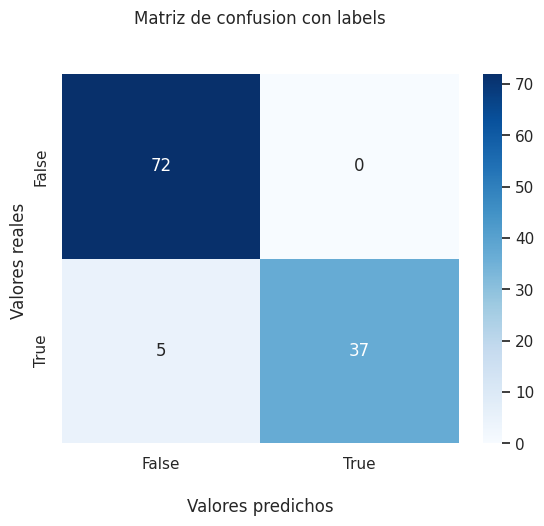

In [ ]:
#Grafico Matriz de confusion - CLASES PROFESOR
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[72,  0],
       [ 5, 37]])

In [ ]:
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
(print(tn, fp, fn, tp ))

72 0 5 37


**Accuracy**

(Aciertos / Total)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.956140350877193

In [ ]:
#accuracy_score
(tn+ tp) / (tn+ fp+ fn+ tp)

0.956140350877193

**Precision**

(Aciertos Positivos / Todos los Positivos)

Solo considera la clase POSITIVA

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

1.0

In [ ]:
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negativa = metrics.precision_score(y_test, y_pred, pos_label=0)
precision_positiva, precision_negativa

(1.0, 0.935064935064935)

In [ ]:
#precision_score
tp/ (tp+fp)

1.0

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8809523809523809

**Sensibilidad / Recall** (+)

Tasa de Verdaderos Positivos

Aciertos Positivos / Aciertos Positivos + Desaciertos negativos

In [ ]:
# recall_score
tp/ (tp+fn)

0.8809523809523809

**Especificidad (-)**

Tasa de Falsos Positivos = 1-Especificidad

Es la inversa de la Sensibilidad en los positivos


In [ ]:
#Especialidad / specificity
tn /(tn+fp)

1.0

**F1 Score**

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9367088607594937

In [ ]:
#f1 score:
#2 * (Recall * Precision) / (Recall + Precision)
2 * ((tp/ (tp+fn)) * (tp/ (tp+fp))) / ((tp/ (tp+fn)) + (tp/ (tp+fp)))

0.9367088607594937

### **ROIC** xxxxxxxxx

**Ejemplo Matriz Chat GPT**

Regresion Logistica con Breast_Cancer

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-47-5eeb4fb7ab43>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + classes)
<ipython-input-47-5eeb4fb7ab43>:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + classes)


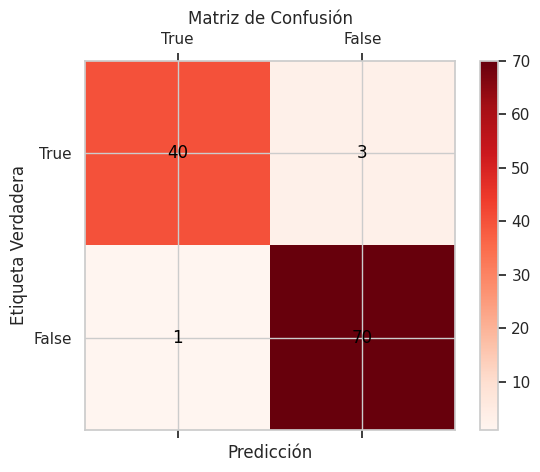

In [ ]:
#Matriz completa  - chatgpt
#breast_cancer y LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Cargar el conjunto de datos
data = load_breast_cancer()

# Obtener características y etiquetas
X = data.data
y = data.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
model = LogisticRegression()

# Ajustar el modelo utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Predecir las etiquetas para los datos de prueba
y_pred = model.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Mostrar la matriz de confusión como una imagen de colores
cax = ax.matshow(cm, cmap='Reds')

# Agregar una barra de colores a la derecha de la imagen
fig.colorbar(cax)

# Etiquetas de los ejes
classes = ['True', 'False']
ax.set_xticklabels([''] + classes)
ax.set_yticklabels([''] + classes)

# Añadir etiquetas a cada celda
for i in range(len(classes)):
    for j in range(len(classes)):
        text = ax.text(j, i, cm[i, j], ha='center', va='center', color='black')

# Título y etiquetas de los ejes
ax.set_title('Matriz de Confusión')
ax.set_xlabel('Predicción')
ax.set_ylabel('Etiqueta Verdadera')

# Mostrar la figura
plt.show()

### **II AS de Regresion**

C46: Ej1 https://colab.research.google.com/drive/1ufBomZ-sRaYntJmD0bnMTwwfGNW2sfc-#scrollTo=xXKdsaVh_mGY

C46:Ej2  https://colab.research.google.com/drive/1CsIatoUwJcKhrEUAJRFQkZjaE1oHf_bh

C46:Ej3 https://colab.research.google.com/drive/1Bhs5qiysIKNZlCzWv6P2tAKk6uHzocyn

In [ ]:
# Metricas Mas Importantes
from sklearn import metrics

# Mean Squared Error
print("MSE      : ", metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error
print("RMSE     : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#Mean Absolute Error
print("MAE      : ", metrics.mean_absolute_error(y_test, y_pred))

#R2 Score
print("R2 Score : ", metrics.r2_score(y_test, y_pred))


In [ ]:
# Metricas I
from sklearn import metrics

#Mean Absolute Error
#En valores de la escala
print("MAE      : ", metrics.mean_absolute_error(y_test, y_pred))

#MAPE
#En terminos % (No es sutil con valores cercanos a Cero)
print("MAPE     : ", mape(y_test, y_pred))


#RAE
#En terminos %


In [ ]:
# Metricas II
from sklearn import metrics

# Mean Squared Error
#En Valores fuera de escala (cuadrados)
print("MSE      : ", metrics.mean_squared_error(y_test, y_pred))

# Root Mean Squared Error
#En valores de la escala
print("RMSE     : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
# Metricas II
from sklearn import metrics

#R2 Score
#Es la varianza explicada
print("R2 Score : ", metrics.r2_score(y_test, y_pred))

#R2 Ajustado
#Soluciona el Sesgo cuando existen muchas variables independientes



In [ ]:
#Med AE
#Mediana Absoluta Error
print("Med AE: ", metrics.median_absolute_error(y_test,y_pred))


In [ ]:
#Maximo Error
print("Max Error: ", metrics.max_error(y_test,y_pred))

#Intersepto
print("Intersepto:  ", regressor.intercept_)

#La pendiente
print("Pendiente:  ",regressor.coef_)


In [ ]:
# Metricas KERAS

model.get_weights()
model.evaluate(xst, yst)

### **III AnoS Cluster**

C47: https://colab.research.google.com/drive/15qaoGQO5BKLCX9BsHB74fvfGFMD9myJz

### **III AnoS**

## 6) Optimizacion

### Graficos

C14: https://colab.research.google.com/drive/1s-FNOvqOffAauk6lI4oXnzG-MrMqs8-8




**Arbol de Decision**

C40: https://colab.research.google.com/drive/1d_KjFHsYxWMgy8EFgThfyxZaRFWjDCrM#scrollTo=ETaEXIoJsCl0

In [ ]:
#Librerias generales
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#Librerias de Arbol de decision
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

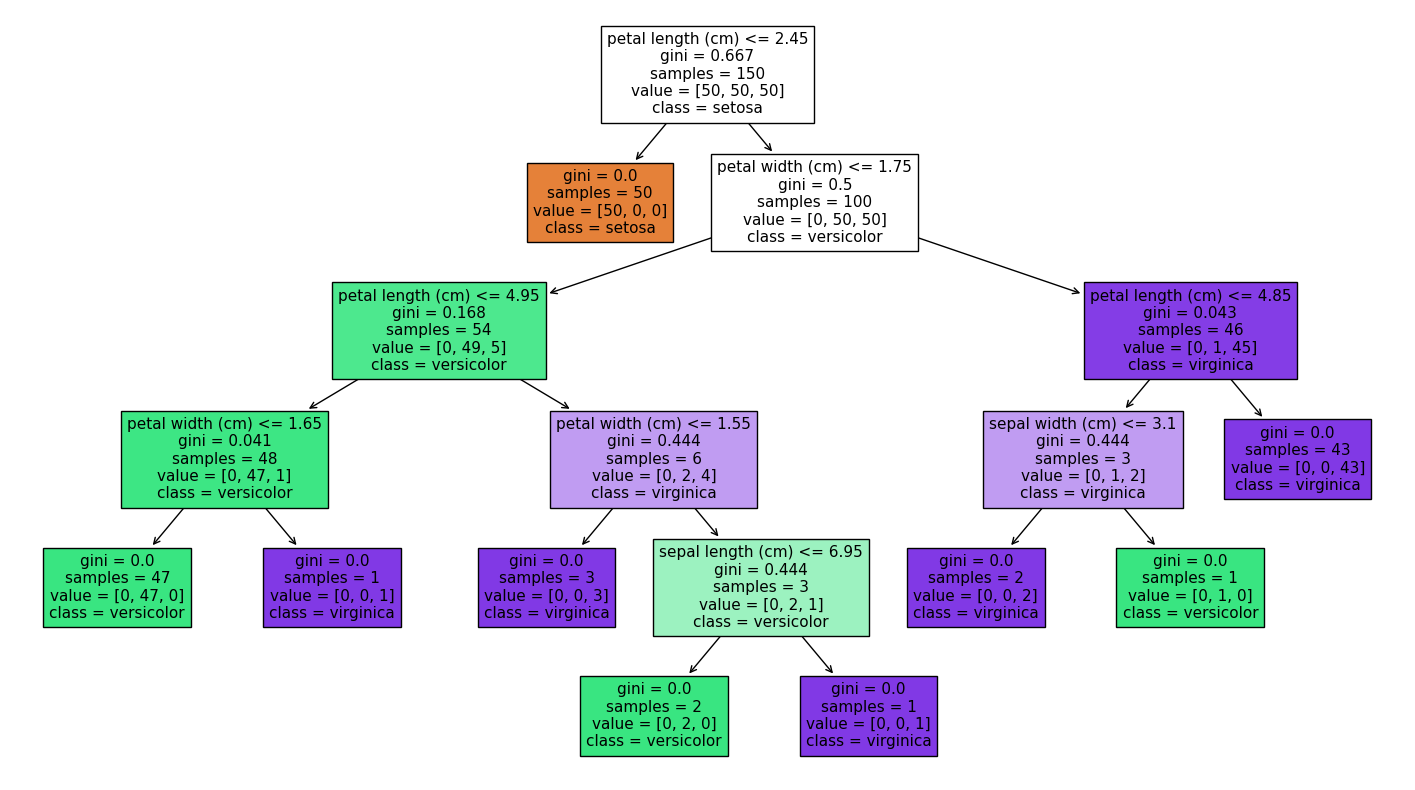

In [ ]:
# 2   Cargar Datset
iris = datasets.load_iris()

# 3   Definir las variables X e y
X = iris.data
y = iris.target

# 4   Dividir las Variables: train_test_split

# 5   Instanciar/Definir el Modelo elegido (Algoritmos)
clf = DecisionTreeClassifier(random_state=1234)

# 6   Ajustar/Entrenar el Modelo.
##SIN SPLIT
clf = clf.fit(X, y)

# 7   Predicciones: Comparo con lo real (y_tes)
# 8   Matriz de confusion
# 9   Accuracy y Otras constataciones

# 10  Graficar
fig = plt.figure(figsize=(18,10))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

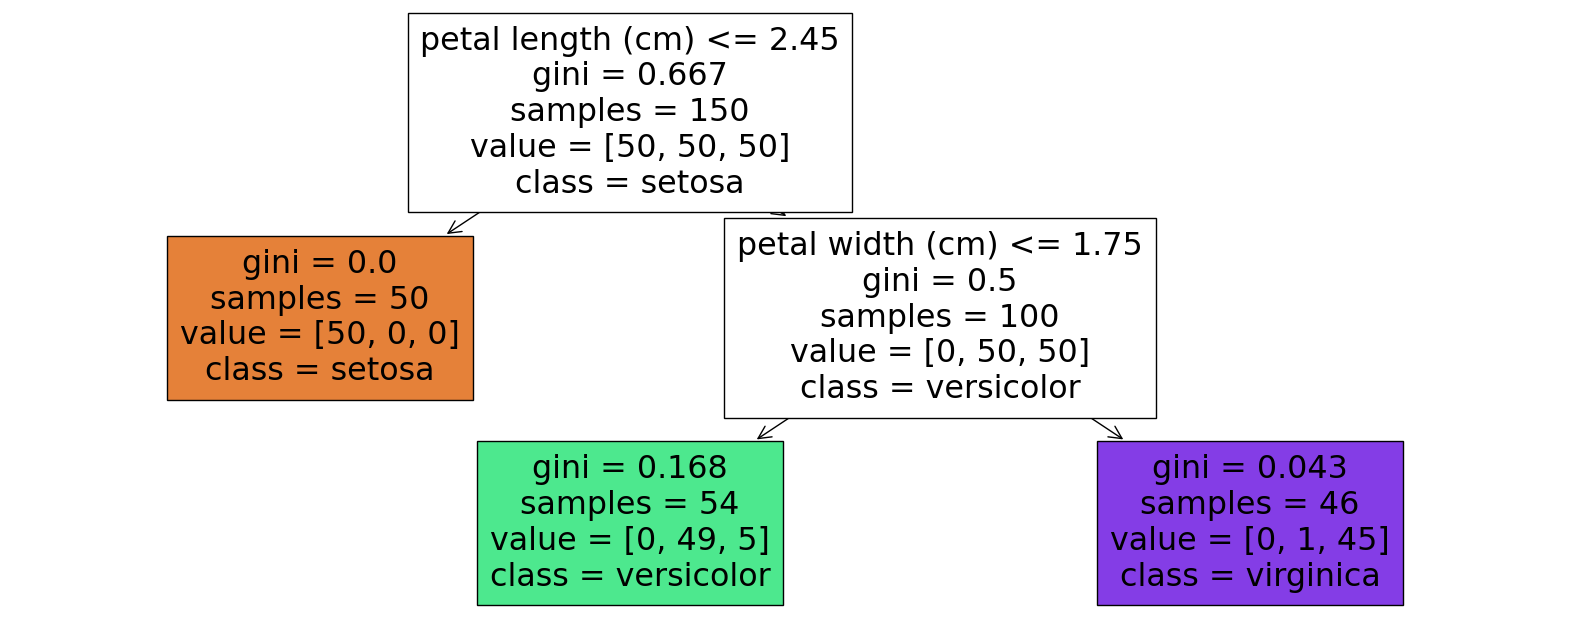

In [ ]:

## Modifico la altura del arbol

# 5   Instanciar/Definir el Modelo elegido (Algoritmos)
clf = DecisionTreeClassifier( max_depth=2, random_state=1234)

# 6   Ajustar/Entrenar el Modelo. SIN SPLIT
model = clf.fit(X, y)

# 10  Graficar
fig = plt.figure(figsize=(20,8))
_ = tree.plot_tree(clf,
                   feature_names=iris.feature_names,
                   class_names=iris.target_names,
                   filled=True)

**Arbol de decision: Tipo B**

In [ ]:
! pip install -q dtreeviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
import dtreeviz
import warnings
warnings.filterwarnings('ignore')

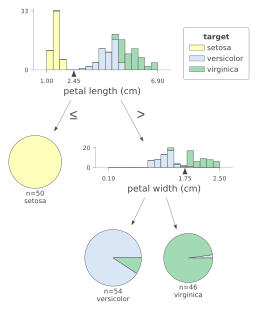

In [ ]:
viz = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
#viz.save("decision_tree.svg") # Guardar la imagen
viz.view()

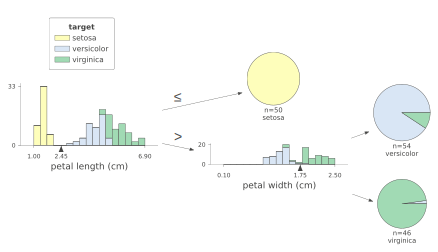

In [ ]:
# Tipo Horizontal
viz = dtreeviz.model(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))
#viz.save("decision_tree.svg") # Guardar la imagen
viz.view(orientation='LR')

**KNN**

https://colab.research.google.com/drive/1s-FNOvqOffAauk6lI4oXnzG-MrMqs8-8#scrollTo=Vd8Ed-kwT8yn

### **Validacion: Cross-Validation**

C48:LOOCV y Validacion simple https://colab.research.google.com/drive/1MgftuzcXEhrllEJgUuADs2G7qBaCVgIw#scrollTo=rqoMoCdqWnU2

C48:Stratified K-FOLD https://colab.research.google.com/drive/12U_TSmp1eDaH5GhXab7H16tg9Yhwp4Tq

C48:Stratified K-FOLD https://colab.research.google.com/drive/1x3KtpnhT1lb0maILsGOQbmGF4LShYpDD

LOOCV

In [ ]:
#Descargo Librerias
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

#Instancio el modelo
cv = LeaveOneOut()

# Instancio Modelo: Random Forest en este ejemplo
model = RandomForestClassifier(random_state=1,n_estimators=30, criterion="gini",max_depth=4)


In [ ]:
#Evaluar el modelo para CLASIFICACION
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, verbose=1)

#Reportar el performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

In [ ]:
#Evaluar el modelo para REGRESION (criterio de comparacion MAE)
from sklearn.metrics import mean_squared_error,  make_scorer, mean_absolute_error
MAE = make_scorer(mean_absolute_error)
scores = cross_val_score(model, X, y, scoring=MAE, cv=cv,error_score='raise',verbose=1)

#Convertir a postivos
scores = abs(scores)

#Reportar el performance
print('MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

K-Fold

In [ ]:
#Descargo Librerias
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Instancio Modelo: Random Forest en este ejemplo
model = RandomForestRegressor(random_state=42, n_estimators=10,max_depth=4)


In [ ]:
##Evaluar el modelo para CLASIFICACIONcon 7 folds y scoring r2
scores = cross_val_score(model, X, y, cv=7, verbose=1,scoring='r2')

#Reportar el performance para regresion
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Stratified K-flod

### **Hyper Tuning**

C49: https://colab.research.google.com/drive/1oJQtGuswbHOLoG_Z3j3zliRZ8gDhVuzY

C49 EJEMPLO 2: https://colab.research.google.com/drive/1t6EjpfN4zS3bwp_QdI1mv2Vw-wVly2kj

### Ensamble: Boosting

C50:AdaBoost https://colab.research.google.com/drive/1z7sYWcLeYgCfddClsMPRsrMEeJcKRJSt

C50:Xgboost https://colab.research.google.com/drive/1n_7AoMI54BmmjvMNiRgKXnC5KaUqQxO-

C50:LightGBM https://colab.research.google.com/drive/1qafI_eSGpUlxvqWD5QhZ6iEwU5fKxLCd

C50:Gradient Boosting  https://colab.research.google.com/drive/1x6fyu84NSUg9oVWyrh3zOGe4GT_J2y_x

Kaggle: Titanic Dataset: https://www.kaggle.com/code/yassineghouzam/titanic-top-4-with-ensemble-modeling

AdaBoost

Xgboost

LightGBM

Gradient Boosting

### Oversampling

Generamos nuevas muestras para balancear

https://colab.research.google.com/drive/1jySHGHHvDelAegqUNwg4_lLdCJcUuLmW

In [ ]:
#Cuento la cantidad de muestras originales que tengo de cada clase (aplico sobre todo el dataset = "y")
from collections import Counter
counter = Counter(y)
counter


In [ ]:
#Genero muestras artificales y equilibro las cantidades
from imblearn.over_sampling import SMOTE
os = SMOTE()

X_os, y_os = os.fit_resample(X, y)

counter = Counter(y_os)

#Train/Test Siplit pero con X_os y_os
X_train, X_test, y_train, y_test = train_test_split(X_os, y_os, test_size = 0.25)

#Ahora continuo con el resto de los pasos: model > fit > y_pred > Metricas

# FIN